CN class group mean = 7418.973333, variance = 810867.474844
MCI class group mean = 6772.206847, variance = 1281974.024261
AD class group mean = 5759.518072, variance = 1034885.085015


<function matplotlib.pyplot.show>

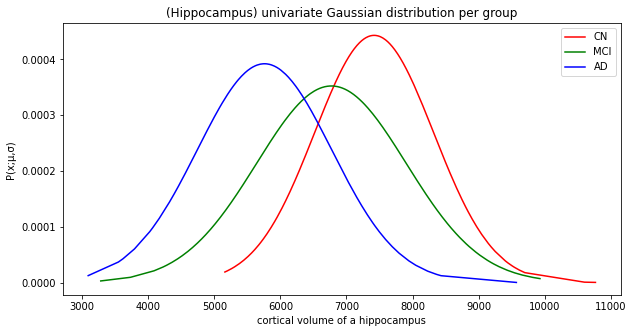

In [93]:
#import some packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#define a function to return pdf of univariate gaussian distribution
def univariate(x, mean, var):
  return ((1. / np.sqrt(2 * np.pi * var)) * np.exp(-(x-mean)**2 / (2 * var)))

#load csv dataset from github
data = pd.read_csv('https://raw.githubusercontent.com/yongyongkr/yongyong/main/alzheimers_disease_dataset.csv')

#divide each diagnosis group
data_CN = data[data.Class == 0]
data_MCI = data[data.Class == 1]
data_AD = data[data.Class == 2]

#convert pandas series to the numpy's
arr_CN = data_CN.to_numpy()
arr_MCI = data_MCI.to_numpy()
arr_AD = data_AD.to_numpy()

#calcuate the value of mean and variables per group
Hip_CN_mean = np.mean(arr_CN[:,2])
Hip_CN_var = np.var(arr_CN[:,2])
Hip_MCI_mean = np.mean(arr_MCI[:,2])
Hip_MCI_var = np.var(arr_MCI[:,2])
Hip_AD_mean = np.mean(arr_AD[:,2])
Hip_AD_var = np.var(arr_AD[:,2])

print("CN class group mean = %f, variance = %f" %(Hip_CN_mean, Hip_CN_var))
print("MCI class group mean = %f, variance = %f" %(Hip_MCI_mean, Hip_MCI_var))
print("AD class group mean = %f, variance = %f" %(Hip_AD_mean, Hip_AD_var))

#plot univariate gaussian distribution
x0 = sorted(arr_CN[:,2])
y0 = univariate(x0, Hip_CN_mean, Hip_CN_var)
x1 = sorted(arr_MCI[:,2])
y1 = univariate(x1, Hip_MCI_mean, Hip_MCI_var)
x2 = sorted(arr_AD[:,2])
y2 = univariate(x2, Hip_AD_mean, Hip_AD_var)

plt.figure(figsize=(10,5))
plt.plot(x0,y0,'r-',label='CN')
plt.plot(x1,y1,'g-',label='MCI')
plt.plot(x2,y2,'b-',label='AD')
plt.xlabel("cortical volume of a hippocampus")
plt.ylabel("P(x;μ,σ) ")
plt.grid()
plt.title("(Hippocampus) univariate Gaussian distribution per group")
plt.legend(loc='upper right')
plt.show

CN class group mean = 3830.055556, variance = 402269.830247
MCI class group mean = 3499.640514, variance = 555119.034821
AD class group mean = 2815.289157, variance = 462725.980645


<function matplotlib.pyplot.show>

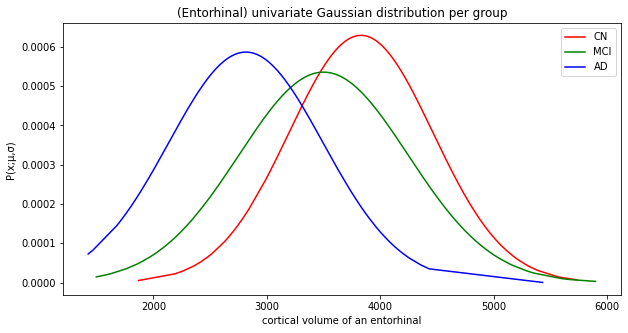

In [88]:
#calcuate the value of mean and variables per group
En_CN_mean = np.mean(arr_CN[:,3])
En_CN_var = np.var(arr_CN[:,3])
En_MCI_mean = np.mean(arr_MCI[:,3])
En_MCI_var = np.var(arr_MCI[:,3])
En_AD_mean = np.mean(arr_AD[:,3])
En_AD_var = np.var(arr_AD[:,3])

print("CN class group mean = %f, variance = %f" %(En_CN_mean, En_CN_var))
print("MCI class group mean = %f, variance = %f" %(En_MCI_mean, En_MCI_var))
print("AD class group mean = %f, variance = %f" %(En_AD_mean, En_AD_var))

#plot univariate gaussian distribution
x3 = sorted(arr_CN[:,3])
y3 = univariate(x3, En_CN_mean, En_CN_var)
x4 = sorted(arr_MCI[:,3])
y4 = univariate(x4, En_MCI_mean, En_MCI_var)
x5 = sorted(arr_AD[:,3])
y5 = univariate(x5, En_AD_mean, En_AD_var)

plt.figure(figsize=(10,5))
plt.plot(x3,y3,'r-',label='CN')
plt.plot(x4,y4,'g-',label='MCI')
plt.plot(x5,y5,'b-',label='AD')
plt.xlabel("cortical volume of an entorhinal")
plt.ylabel("P(x;μ,σ) ")
plt.grid()
plt.title("(Entorhinal) univariate Gaussian distribution per group")
plt.legend(loc='upper right')
plt.show

CN class group mu = [7418.97333333 3830.05555556] 
 covariance matrix = [[812673.41576837 255492.22420193]
 [255492.22420193 403165.75414501]]


Text(0, 0.5, 'cortical volume of an entorhinal')

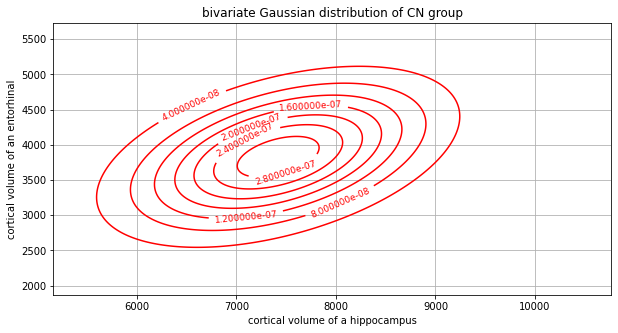

In [89]:
#define a function to return pdf of bivariate gaussian distribution
def bivariate(x,mu,sigma):
    x = x.reshape(-1,1)
    mu = mu.reshape(-1,1)
    p,_ = sigma.shape

    sigma_inv = np.linalg.inv(sigma)
    denominator = np.sqrt((2 * np.pi)**p * np.linalg.det(sigma))
    exponent = -(1/2) * ((x - mu).T @ sigma_inv @ (x - mu))
    
    return  float((1. / denominator) * np.exp(exponent))

#reshape data for bivariate function and calculate mu, sigma of CN group
hip_cn = arr_CN[:,2]
hip_cn = hip_cn.reshape(-1,1)
en_cn = arr_CN[:,3]
en_cn = en_cn.reshape(-1,1)
cn = np.hstack((hip_cn, en_cn))

sigma_cn = np.cov(cn[:,0],cn[:,1])
mu_cn = cn.mean(axis = 0)

print("CN class group mu = %s \n covariance matrix = %s" %(mu_cn, sigma_cn))

#plot bivariate gaussian distribution
N = len(hip_cn)
X = np.linspace(min(hip_cn),max(hip_cn), N)
Y = np.linspace(min(en_cn),max(en_cn), N)
X, Y = np.meshgrid(X, Y)

zz = np.array([bivariate(np.array([xx,yy]).reshape(-1,1), mu_cn, sigma_cn) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y))])  
Z = zz.reshape(X.shape)

plt.rcParams['axes.grid'] = True
fig1, ax1 = plt.subplots(figsize=(10,5))
F1 = ax1.contour(X, Y, Z, 8, colors='r')
ax1.clabel(F1, fontsize=9, inline=True, fmt="%e")
ax1.set_title('bivariate Gaussian distribution of CN group')
ax1.set_xlabel("cortical volume of a hippocampus")
ax1.set_ylabel("cortical volume of an entorhinal")

MCI class group mu = [6772.20684736 3499.64051355], 
 covariance matrix = [[1283805.41572447  526573.16017934]
 [ 526573.16017934  555912.06201345]]


Text(0, 0.5, 'cortical volume of an entorhinal')

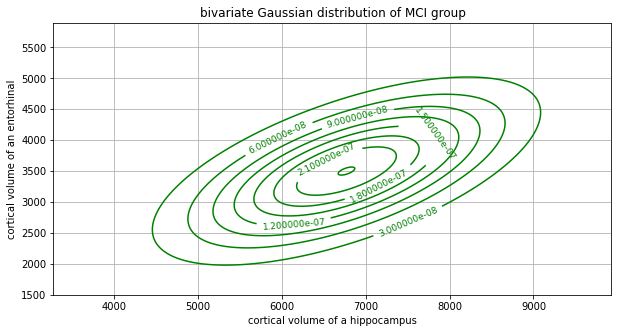

In [90]:
#reshape data for bivariate function and calculate mu, sigma of MCI group
hip_mci = arr_MCI[:,2]
hip_mci = hip_mci.reshape(-1,1)
en_mci = arr_MCI[:,3]
en_mci = en_mci.reshape(-1,1)
mci = np.hstack((hip_mci, en_mci))

sigma_mci = np.cov(mci[:,0],mci[:,1])
mu_mci = mci.mean(axis = 0)

print("MCI class group mu = %s, \n covariance matrix = %s" %(mu_mci, sigma_mci))

#plot bivariate gaussian distribution
N = len(hip_mci)
X = np.linspace(min(hip_mci),max(hip_mci), N)
Y = np.linspace(min(en_mci),max(en_mci), N)
X, Y = np.meshgrid(X, Y)

zz = np.array([bivariate( np.array([xx,yy]).reshape(-1,1), mu_mci, sigma_mci) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

plt.rcParams['axes.grid'] = True
fig2, ax2 = plt.subplots(figsize=(10,5))
F2 = ax2.contour(X, Y, Z, 8, colors='g')
ax2.clabel(F2, fontsize=9, inline=True, fmt="%e")
ax2.set_title('bivariate Gaussian distribution of MCI group')
ax2.set_xlabel("cortical volume of a hippocampus")
ax2.set_ylabel("cortical volume of an entorhinal")

AD class group mu = [5759.51807229 2815.28915663], 
 covariance matrix = [[1039058.00874466  426044.03507579]
 [ 426044.03507579  464591.81121259]]


Text(0, 0.5, 'cortical volume of an entorhinal')

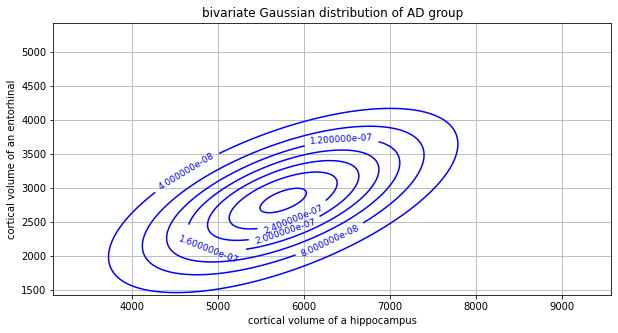

In [91]:
#reshape data for bivariate function and calculate mu, sigma of AD group
hip_ad = arr_AD[:,2]
hip_ad = hip_ad.reshape(-1,1)
en_ad = arr_AD[:,3]
en_ad = en_ad.reshape(-1,1)
ad = np.hstack((hip_ad, en_ad))

sigma_ad = np.cov(ad[:,0],ad[:,1])
mu_ad = ad.mean(axis = 0)

print("AD class group mu = %s, \n covariance matrix = %s" %(mu_ad, sigma_ad))

#plot bivariate gaussian distribution
N = len(hip_ad)
X = np.linspace(min(hip_ad),max(hip_ad), N)
Y = np.linspace(min(en_ad),max(en_ad), N)
X, Y = np.meshgrid(X, Y)

zz = np.array([bivariate( np.array([xx,yy]).reshape(-1,1), mu_ad, sigma_ad) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y))])
Z = zz.reshape(X.shape)

plt.rcParams['axes.grid'] = True
fig3, ax3 = plt.subplots(figsize=(10,5))
F3 = ax3.contour(X, Y, Z, 8, colors='b')
ax3.clabel(F3, fontsize=9, inline=True, fmt="%e")
ax3.set_title('bivariate Gaussian distribution of AD group')
ax3.set_xlabel("cortical volume of a hippocampus")
ax3.set_ylabel("cortical volume of an entorhinal")

<Results and Discussions>
  By the results of task 1, cortical volume of a hippocampus is in inverse relationship with alzheimer disease. Person whose volume is less than 6000, will be mostly considered as an Alzeheimer disease patient. Variance of CN class group is the smallest among 3 groups, and Variance of MCI class group is the biggest. It means MCI group has some mild cognitive impairments, so they are hard to be sure of illness.
  By the results of task 2, cortical volume of a entorhinal is also in inverse relationship with alzheimer disease. An order of variance is same as that of hippocampus, so we can also say that person who belongs to the MCI group is hard to be considered whether he is patient or not.
  By the results of task 3, all 3 groups have positive value in Cov(1,2) or Cov(2,1). It represents a positive correlation between cortical volume of hippocampus and entorhinal. In the midst of that, CN group's (1,2) value is the smallest. So we can think the volume of those 2 parts in healthy person may differ(not both of them are always big), but sick person has both small cortical volumes in his brain.
  Finally, all of these results of the tasks makes us to think that the principal component analysis is the best option for us when we have to lower the dimension of the dataset. And we can learn about the importance of eigenvector to work with huge dataset for machine learning.


<Review>
  For the task 1 and 2, I declared cortical volume of a hippocampus(or entorhinal) as X, returned value of the univariate function(pdf) as Y. Then I plotted with a matplotlib.
  At first, I faced a problem when I plotted. There were many lines connecting random dots of the univariate gaussian distribution. It happened because of some unsorted data. After I sorted X values, I could solve task 1 and 2 easily.
  For the task 3, It was tough to understand function and its parameters. I learned a lot about the way to reshape vectors and by using various kinds of numpy functions.